

# <font color=Darkred>**Statistical inference**</font>
---


## <font color=Darkblue>**Identifying the impact of an email marketing campaign.**  </font>

> Hillstrom, K. (2008) __The MineThatData e-mail analytics and data mining challenge__. [MineThatData blog](http://blog.minethatdata.com/2008/03/minethatdata-e-mail-analytics-and-data.html). Accessed 15 October 2019.

In [ ]:
# Import the basic python packages for data science
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm # Statistical inference models
import seaborn as sns # Improve charts / visuals

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<br>

### <font color=Darkred>**1. The dataset**</font>

This dataset contains __64,000__ customers who last purchased within twelve months. The customers were involved in an e-mail test.
* 1/3 were randomly chosen to receive an e-mail campaign featuring Mens merchandise.
* 1/3 were randomly chosen to receive an e-mail campaign featuring Womens merchandise.
* 1/3 were randomly chosen to not receive an e-mail campaign.

<br>

During a period of two weeks following the e-mail campaign, results were tracked. Your job is to tell the world if the Mens or Womens e-mail campaign was successful.

Historical customer attributes at your disposal include:
* Recency: Months since last purchase.
* History_Segment: Categorization of dollars spent in the past year.
* History: Actual dollar value spent in the past year.
* Mens: 1/0 indicator, 1 = customer purchased Mens merchandise in the past year.
* Womens: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year.
* Zip_Code: Classifies zip code as Urban, Suburban, or Rural.
* Newbie: 1/0 indicator, 1 = New customer in the past twelve months.
* Channel: Describes the channels the customer purchased from in the past year.
* Segment: describes the e-mail campaign the customer received: Mens E-Mail, Womens E-Mail or No E-Mail.

<br>

Finally, we have a series of variables describing activity in the two weeks following delivery of the e-mail campaign:

* Visit: 1/0 indicator, 1 = Customer visited website in the following two weeks.
* Conversion: 1/0 indicator, 1 = Customer purchased merchandise in the following two weeks.
* Spend: Actual dollars spent in the following two weeks.

 <br>
 
 #### <font color=Darkred>**1.1. Import the dataset**</font>

In [ ]:
# Import the data from drive

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving MIneThatData_raw.csv to MIneThatData_raw.csv
User uploaded file "MIneThatData_raw.csv" with length 3900976 bytes


 <br>

 #### <font color=Darkred>**1.2. Read the file as a dataframe**</font>


In [ ]:
# Read the csv file as a pandas dataframe
df = pd.read_csv('MIneThatData_raw.csv', 
               delimiter=',').drop(columns=['history_segment'])

# Visualize the dataframe
print('Number of rows and columns:', df.shape)
print('Data types:', df.dtypes)
df.head(5)

Number of rows and columns: (64000, 11)
Data types: recency         int64
history       float64
mens            int64
womens          int64
zip_code       object
newbie          int64
channel        object
segment        object
visit           int64
conversion      int64
spend         float64
dtype: object


,recency,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0


<br>
 
#### <font color=Darkred>**1.3. One-hot encoding (dummyfication) of the categorical variables** </font>

In [ ]:
# To drop the first label category (to avoid the "dummy variable trap"), use drop_first = True
df1 = pd.get_dummies(df, drop_first=False)
df1.head(5)

,recency,history,mens,womens,newbie,visit,conversion,spend,zip_code_Rural,zip_code_Surburban,zip_code_Urban,channel_Multichannel,channel_Phone,channel_Web,segment_Mens E-Mail,segment_No E-Mail,segment_Womens E-Mail
0,10,142.44,1,0,0,0,0,0.0,0,1,0,0,1,0,0,0,1
1,6,329.08,1,1,1,0,0,0.0,1,0,0,0,0,1,0,1,0
2,7,180.65,0,1,1,0,0,0.0,0,1,0,0,0,1,0,0,1
3,9,675.83,1,0,1,0,0,0.0,1,0,0,0,0,1,1,0,0
4,2,45.34,1,0,0,0,0,0.0,0,0,1,0,0,1,0,0,1


<br>

### <font color=Darkred>**2. Descriptive analysis**</font>

#### <font color=Darkred>**2.1 Summary statistics**</font>


In [ ]:
df1.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
recency,64000.0,5.76,3.51,1.00,2.00,6.00,9.00,12.00
history,64000.0,242.09,256.16,29.99,64.66,158.11,325.66,3345.93
mens,64000.0,0.55,0.50,0.00,0.00,1.00,1.00,1.00
womens,64000.0,0.55,0.50,0.00,0.00,1.00,1.00,1.00
newbie,64000.0,0.50,0.50,0.00,0.00,1.00,1.00,1.00
visit,64000.0,0.15,0.35,0.00,0.00,0.00,0.00,1.00
conversion,64000.0,0.01,0.09,0.00,0.00,0.00,0.00,1.00
spend,64000.0,1.05,15.04,0.00,0.00,0.00,0.00,499.00
zip_code_Rural,64000.0,0.15,0.36,0.00,0.00,0.00,0.00,1.00
zip_code_Surburban,64000.0,0.45,0.50,0.00,0.00,0.00,1.00,1.00


<br>

#### <font color=Darkred>**2.2. Descriptive charts**</font>



Let's inspect the distribution of how much these customers **spent in the last year** (variable = history).

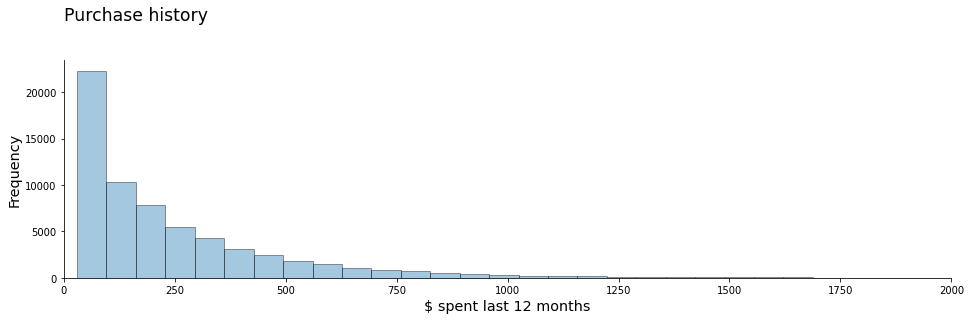

In [ ]:
# Initialize the plot
plt.figure(figsize=(35,4))

# Create a histogram to observe the distribution of 'history' ($ spent last year)
plt.subplot(1,2,1)
graph1 = sns.distplot(df1['history'], kde = False, norm_hist = False, 
             hist_kws=dict(edgecolor="k", linewidth=1))
sns.despine(top=True, right=True, left=False, bottom=False)

# Further customize
plt.title('Purchase history', loc = "left", size = 'xx-large', pad = 40)
plt.xlabel('$ spent last 12 months', size = 'x-large')
plt.xlim(0, 2000)
plt.ylabel('Frequency', size = 'x-large');

plt.show()

<br>

Also, inspect the distribution of **recency**, i.e. how many months since last purchase.

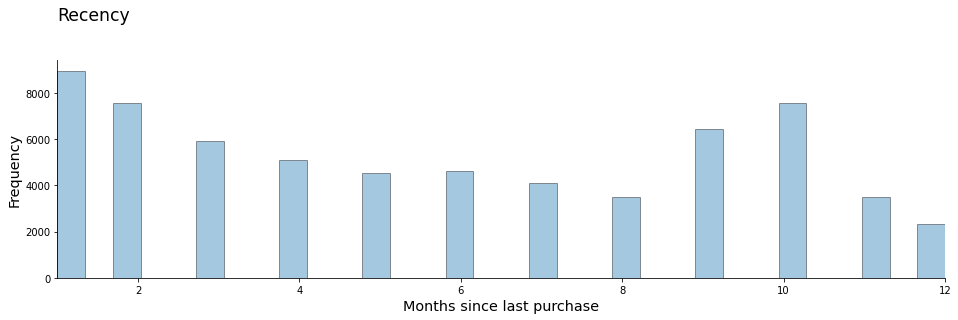

In [ ]:
# Initialize the plot
plt.figure(figsize=(35,4))

# Create a histogram to observe the distribution of 'history' ($ spent last year)
plt.subplot(1,2,1)
graph2 = sns.distplot(df1['recency'], kde = False, norm_hist = False, 
             hist_kws=dict(edgecolor="k", linewidth=1))
sns.despine(top=True, right=True, left=False, bottom=False)

# Further customize
plt.title('Recency', loc = "left", size = 'xx-large', pad = 40)
plt.xlabel('Months since last purchase', size = 'x-large')
plt.xlim(1, 12)
plt.ylabel('Frequency', size = 'x-large');

plt.show()

<br>

### <font color=Darkred>**3. Testing the hypothesis**</font>

#### <font color=Darkred>**3.1. Simple comparison the outcome variables by segment**</font>

In [ ]:
# Read the csv file as a new pandas dataframe
df2 = pd.read_csv('MIneThatData_raw.csv', 
               delimiter=',').drop(columns=['history_segment'])

# To produce a table with the descriptive stats by segment
df2[['segment','spend','visit','conversion']].groupby('segment').describe().round(2).T

# Could also add e.g 'newbie','history','recency' as vars to check group balance.

segment           Mens E-Mail  No E-Mail  Womens E-Mail
spend      count     21307.00   21306.00       21387.00
           mean          1.42       0.65           1.08
           std          17.75      11.59          15.12
           min           0.00       0.00           0.00
           25%           0.00       0.00           0.00
           50%           0.00       0.00           0.00
           75%           0.00       0.00           0.00
           max         499.00     499.00         499.00
visit      count     21307.00   21306.00       21387.00
           mean          0.18       0.11           0.15
           std           0.39       0.31           0.36
           min           0.00       0.00           0.00
           25%           0.00       0.00           0.00
           50%           0.00       0.00           0.00
           75%           0.00       0.00           0.00
           max           1.00       1.00           1.00
conversion count     21307.00   21306.00       21387.00
           mean          0.01       0.01           0.01
           std           0.11       0.08           0.09
           min           0.00       0.00           0.00
           25%           0.00       0.00           0.00
           50%           0.00       0.00           0.00
           75%           0.00       0.00           0.00
           max           1.00       1.00           1.00

<br> 

#### <font color=Darkred>**3.2. Bar plot of the outcome variables by segment**</font>

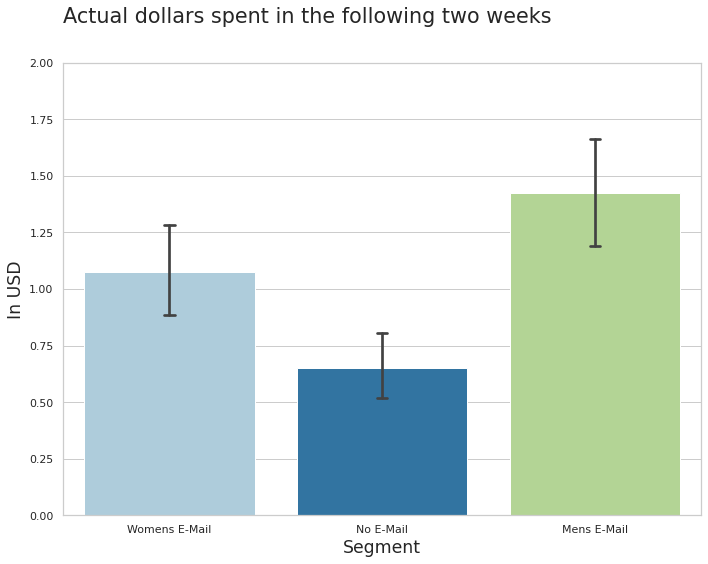

In [ ]:
# Initialize the plot
plt.figure(figsize=(10,8))

# Plots
sns.set(style="whitegrid")
graph3 = sns.barplot(x="segment", y="spend", data=df2, 
                     capsize=.05, palette="Paired")

# Further customize
plt.xlabel('Segment', size = 'x-large')
plt.ylim(0, 2 )
plt.ylabel('In USD', size = 'x-large') 

plt.title('Actual dollars spent in the following two weeks', 
          loc = "left", size = 'xx-large', pad = 40)
plt.tight_layout()

plt.show()

# Could repeat this for 'visit' and 'conversion' if needed

<br>

#### <font color=Darkred>**3.3. Bar plot of the outcome variables by segment and whether customer is new**</font>

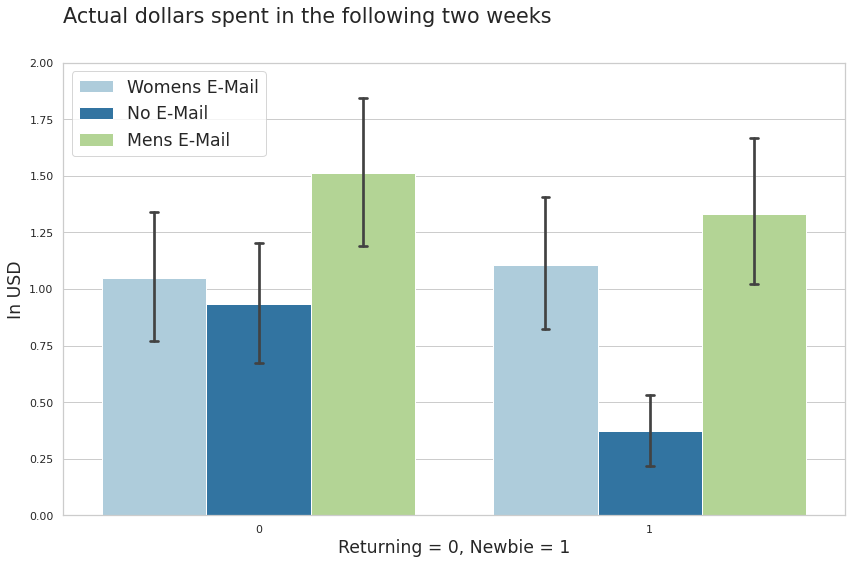

In [ ]:
# Initialize the plot
plt.figure(figsize=(12,8))

# Plots
sns.set(style="whitegrid")
graph4 = sns.barplot(x="newbie", y="spend", hue="segment", data=df2, 
                     capsize=.02, palette="Paired")

# Further customize
plt.xlabel('Returning = 0, Newbie = 1', size = 'x-large')
plt.ylim(0, 2 )
plt.ylabel('In USD', size = 'x-large') 

plt.legend(loc= 'upper left', fontsize="x-large")

plt.title('Actual dollars spent in the following two weeks', 
          loc = "left", size = 'xx-large', pad = 40)
plt.tight_layout()

plt.show()

# Could repeat this for 'visit' and 'conversion' if needed

<br>

#### <font color=Darkred>**3.4. Regression analysis of the amount spent in the next two weeks**</font>

We can also get a summary of the relationships between the covariates (features, predictors, explanatory variables) and the outcome.

For this we run an Ordinary least Square Regression (the multivariate model).

In [ ]:
# Estimate the OLS model (using the statsmodel package - 5 lines of code)

y = df1[['spend']]
X = df1[['segment_Mens E-Mail', 'segment_Womens E-Mail']]
X = sm.add_constant(X) # This will give us the level spent for "No E-Mail".

model1 = sm.OLS(y, X)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.02
Date:                Thu, 14 May 2020   Prob (F-statistic):           8.20e-07
Time:                        10:23:17   Log-Likelihood:            -2.6427e+05
No. Observations:               64000   AIC:                         5.285e+05
Df Residuals:                   63997   BIC:                         5.286e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.65

<br> 

The values of the coeficients associated to Men's E-Mail and Women's E-Mail reflect the averages obtained in the Bar Plot.

* No E-Mail = const = **0.65** 
* Men's E-Mail = 0.65 + 0.77 = **1.42**
* Women's E-Mail = 0.65 + 0.42 = **1.07**

<br>

### <font color=Darkred>**4. Discussion of the results**</font>

The winning solution for the challenge was submitted by Nicolas Radcliffe of [Stochastic Solutions](http://stochasticsolutions.com/).

His paper is titled, "[Hillstrom’s MineThatData Email Analytics Challenge: An Approach Using Uplift Modelling](http://minethatdata.com/Stochastic_Solutions_E-Mail_Challenge_2008.04.30.pdf)".

Among their main results about the women's email campaign:

* The campaign had a positive impact overall;

* There are some segments for which the Women’s mailing, in particular, appeared to reduce rather than increase spending; 

* An extremely small number of people were responsible for over half of the incremental spend.